In [66]:
# Data Preparation & Data Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Building Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
## Evaluating Models
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [3]:
data = pd.read_csv('E:/python/Kaggle/Data/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [9]:
data.dtypes

Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

In [10]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


- Data Cleaning

In [11]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [12]:
data.isnull().any()

Unnamed: 0         False
YearsExperience    False
Salary             False
dtype: bool

In [13]:
data.duplicated().sum()

0

In [14]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [15]:
data.head(1)

,YearsExperience,Salary
0,1.2,39344.0


- Exploratory Data Analysis (EDA)

In [16]:
size_font = '\033[1m'

def shape_info(x,y):
    
    print(size_font,'Number of Columns is = {x}'.format(x=x))
    print(size_font,'Number of Rows is = {y}'.format(y=y))
    
shape_info(data.shape[1],data.shape[0])

 Number of Columns is = 2
 Number of Rows is = 30


In [17]:
data.shape

(30, 2)

In [18]:
size_font = '\033[1m'

def column_name_info(i):
    c=pd.Series(data=i,index=None)
    print(size_font,'Names of Column in Data')

    return c    
    
column_name_info(data.columns)

 Names of Column in Data


0    YearsExperience
1             Salary
dtype: object

In [19]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [21]:
a_1=data.Salary.sum()
a_1

2280120.0

In [22]:
a_2=data.Salary.nunique()
a_2

30

In [23]:
D_1=pd.DataFrame(data=[a_1,a_2],
               index =['Sum_Salary','Nunique_Salary'],
              columns=['Values'])
D_1

,Values
Sum_Salary,2280120.0
Nunique_Salary,30.0


In [24]:
data.Salary.unique()

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [25]:
data.Salary.value_counts()

39344.0     1
46206.0     1
122392.0    1
112636.0    1
116970.0    1
105583.0    1
109432.0    1
113813.0    1
101303.0    1
98274.0     1
91739.0     1
93941.0     1
81364.0     1
83089.0     1
66030.0     1
67939.0     1
61112.0     1
57082.0     1
56958.0     1
55795.0     1
63219.0     1
57190.0     1
64446.0     1
54446.0     1
60151.0     1
56643.0     1
39892.0     1
43526.0     1
37732.0     1
121873.0    1
Name: Salary, dtype: int64

In [26]:
b_1=data.YearsExperience.sum()
b_2=data.YearsExperience.nunique()
D_2=pd.DataFrame(data=[b_1,b_2],
               index =['Sum_Years_Experience','Nunique_Years_Experience'],
              columns=['Values'])
D_2

,Values
Sum_Years_Experience,162.4
Nunique_Years_Experience,28.0


In [27]:
data.YearsExperience.unique()

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.8,  4. ,  4.1,
        4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,  8. ,  8.3,
        8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [28]:
data.YearsExperience.value_counts()

3.3     2
4.1     2
1.2     1
5.4     1
10.4    1
9.7     1
9.6     1
9.1     1
8.8     1
8.3     1
8.0     1
7.2     1
6.9     1
6.1     1
6.0     1
5.2     1
1.4     1
5.0     1
4.6     1
4.2     1
4.0     1
3.8     1
3.1     1
3.0     1
2.3     1
2.1     1
1.6     1
10.6    1
Name: YearsExperience, dtype: int64

In [29]:
data.groupby('YearsExperience')[['Salary']].aggregate('mean')

,Salary
YearsExperience,
1.2,39344.0
1.4,46206.0
1.6,37732.0
2.1,43526.0
2.3,39892.0
3.0,56643.0
3.1,60151.0
3.3,59446.0
3.8,57190.0


In [30]:
data.pivot_table(index='Salary', 
                 columns='YearsExperience',
                aggfunc={'Salary':'mean'})

Salary                                               \
YearsExperience     1.2      1.4      1.6      2.1      2.3      3.0    
Salary                                                                  
37732.0              NaN      NaN  37732.0      NaN      NaN      NaN   
39344.0          39344.0      NaN      NaN      NaN      NaN      NaN   
39892.0              NaN      NaN      NaN      NaN  39892.0      NaN   
43526.0              NaN      NaN      NaN  43526.0      NaN      NaN   
46206.0              NaN  46206.0      NaN      NaN      NaN      NaN   
54446.0              NaN      NaN      NaN      NaN      NaN      NaN   
55795.0              NaN      NaN      NaN      NaN      NaN      NaN   
56643.0              NaN      NaN      NaN      NaN      NaN  56643.0   
56958.0              NaN      NaN      NaN      NaN      NaN      NaN   
57082.0              NaN      NaN      NaN      NaN      NaN      NaN   
57190.0              NaN      NaN      NaN      NaN      NaN      NaN   
60151.0              NaN      NaN      NaN      NaN      NaN      NaN   
61112.0              NaN      NaN      NaN      NaN      NaN      NaN   
63219.0              NaN      NaN      NaN      NaN      NaN      NaN   
64446.0              NaN      NaN      NaN      NaN      NaN      NaN   
66030.0              NaN      NaN      NaN      NaN      NaN      NaN   
67939.0              NaN      NaN      NaN      NaN      NaN      NaN   
81364.0              NaN      NaN      NaN      NaN      NaN      NaN   
83089.0              NaN      NaN      NaN      NaN      NaN      NaN   
91739.0              NaN      NaN      NaN      NaN      NaN      NaN   
93941.0              NaN      NaN      NaN      NaN      NaN      NaN   
98274.0              NaN      NaN      NaN      NaN      NaN      NaN   
101303.0             NaN      NaN      NaN      NaN      NaN      NaN   
105583.0             NaN      NaN      NaN      NaN      NaN      NaN   
109432.0             NaN      NaN      NaN      NaN      NaN      NaN   
112636.0             NaN      NaN      NaN      NaN      NaN      NaN   
113813.0             NaN      NaN      NaN      NaN      NaN      NaN   
116970.0             NaN      NaN      NaN      NaN      NaN      NaN   
121873.0             NaN      NaN      NaN      NaN      NaN      NaN   
122392.0             NaN      NaN      NaN      NaN      NaN      NaN   

                                                     ...                    \
YearsExperience     3.1      3.3      3.8      4.0   ...     6.9      7.2    
Salary                                               ...                     
37732.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
39344.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
39892.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
43526.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
46206.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
54446.0              NaN  54446.0      NaN      NaN  ...      NaN      NaN   
55795.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
56643.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
56958.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
57082.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
57190.0              NaN      NaN  57190.0      NaN  ...      NaN      NaN   
60151.0          60151.0      NaN      NaN      NaN  ...      NaN      NaN   
61112.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
63219.0              NaN      NaN      NaN  63219.0  ...      NaN      NaN   
64446.0              NaN  64446.0      NaN      NaN  ...      NaN      NaN   
66030.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
67939.0              NaN      NaN      NaN      NaN  ...      NaN      NaN   
81364.0              NaN      NaN      NaN      

- Data Visualization

<Figure size 2000x2000 with 0 Axes>

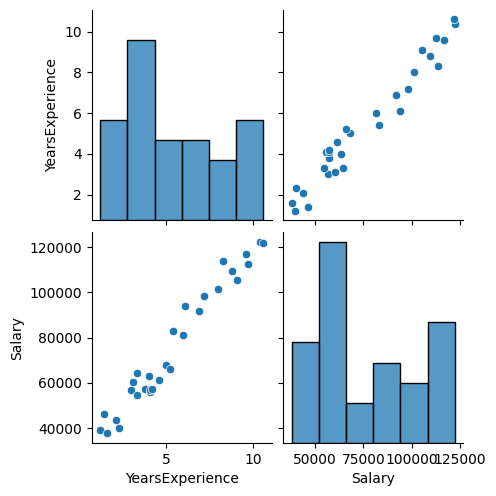

In [31]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

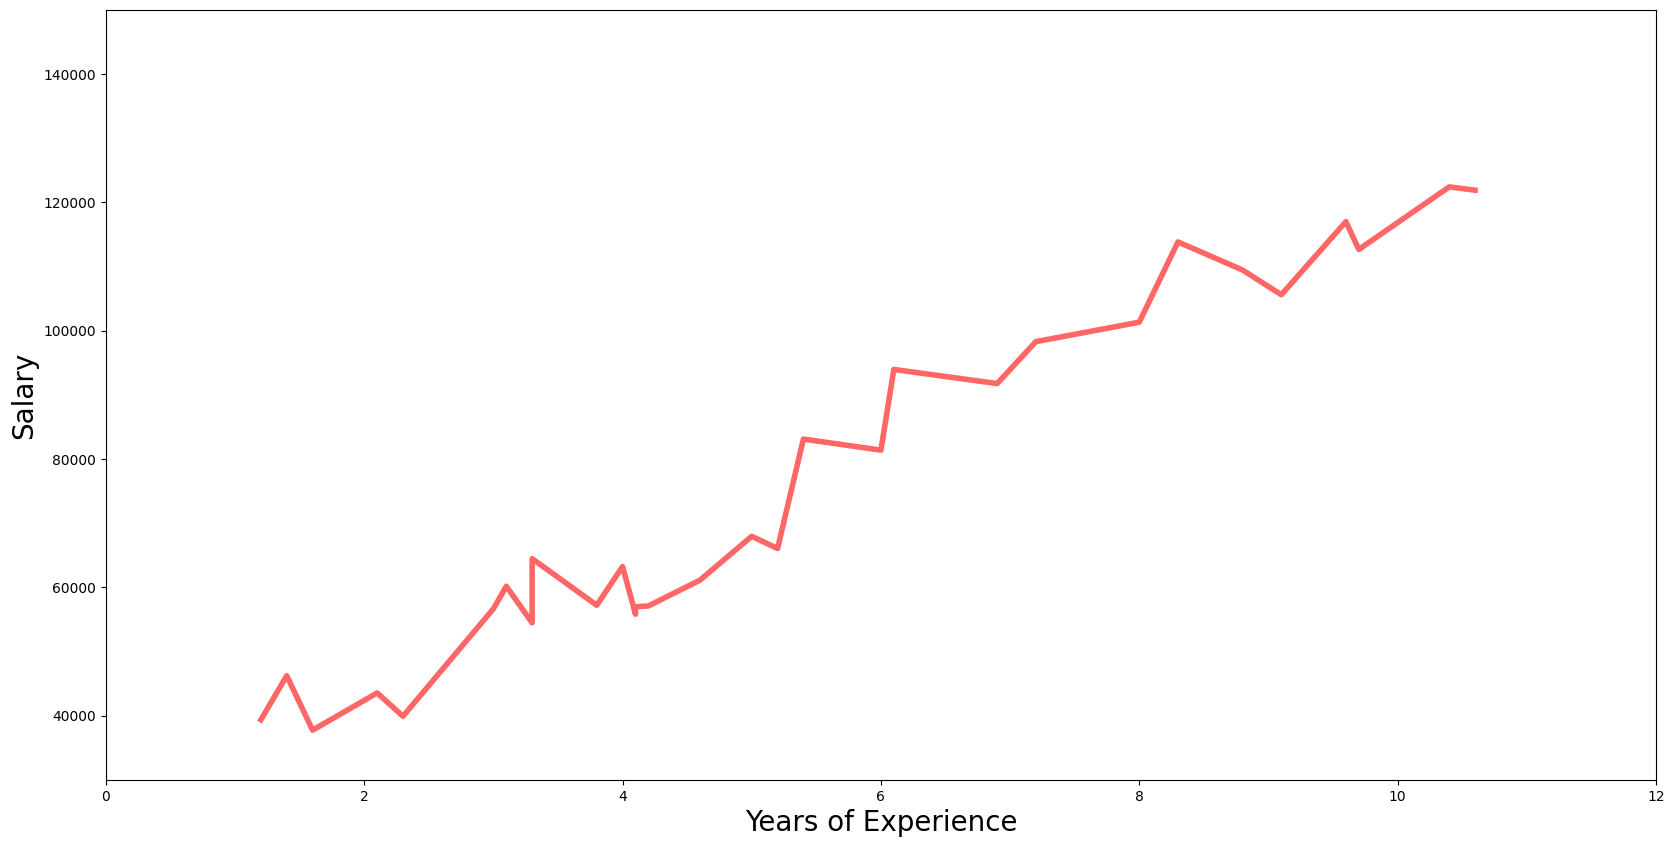

In [32]:
plt.figure(figsize=(20,10))
plt.plot(data.YearsExperience, data.Salary, color='#ff6666', linewidth=4)
plt.xlabel('Years of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.xlim(0,12)
plt.ylim(30000,150000)
plt.show()

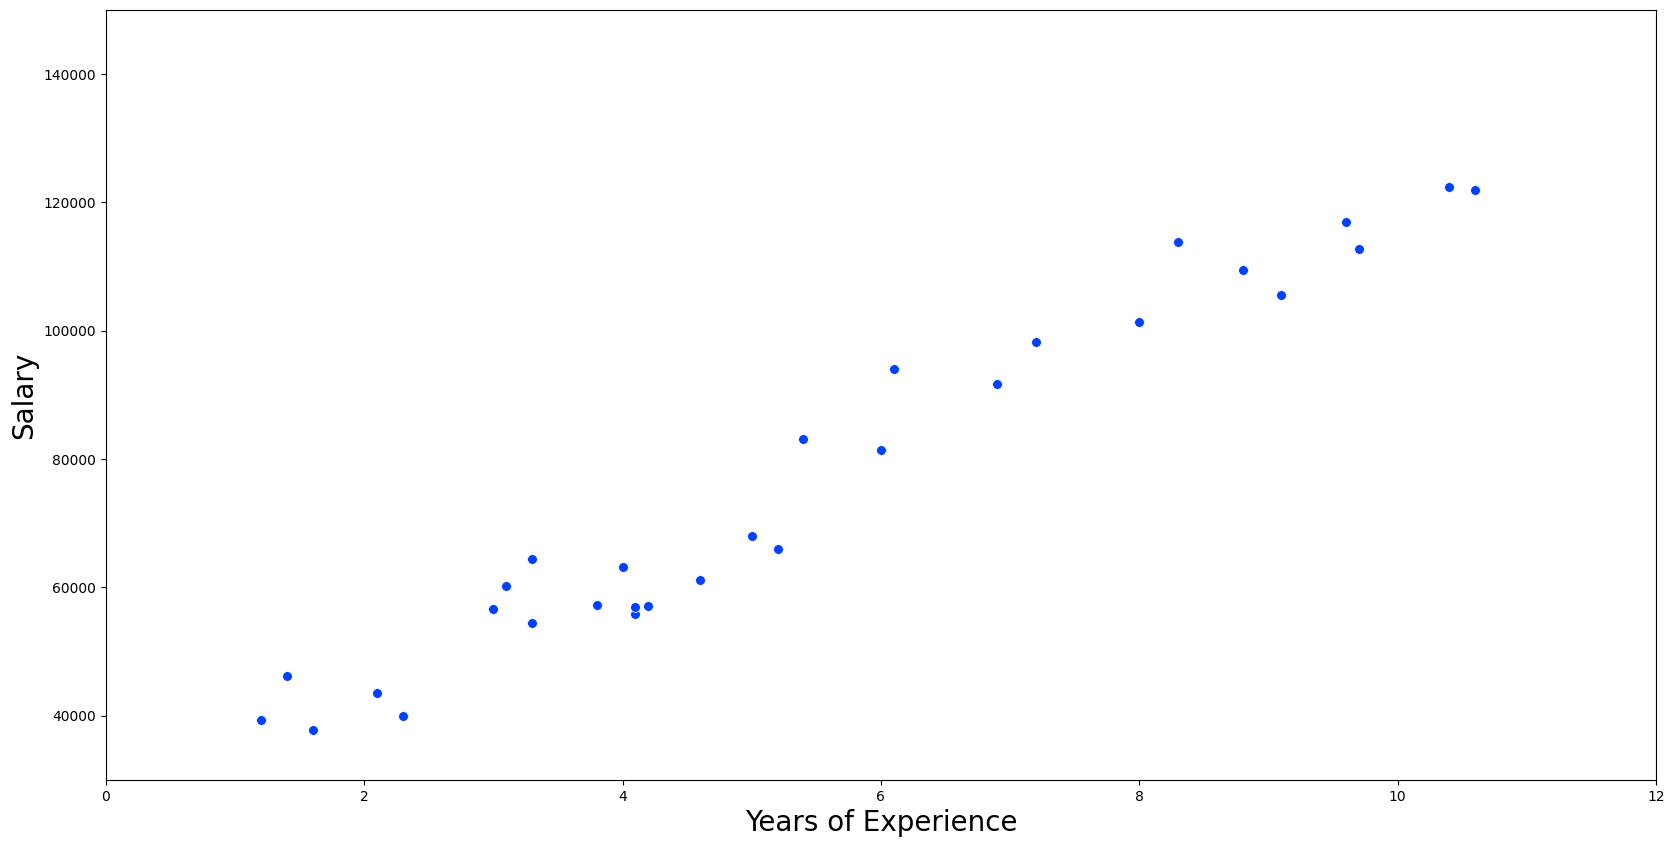

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data.YearsExperience,
                y=data.Salary,
                data=data,
                color='#0040ff',
                s=50)
plt.xlabel('Years of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.xlim(0,12)
plt.ylim(30000,150000)
plt.show()

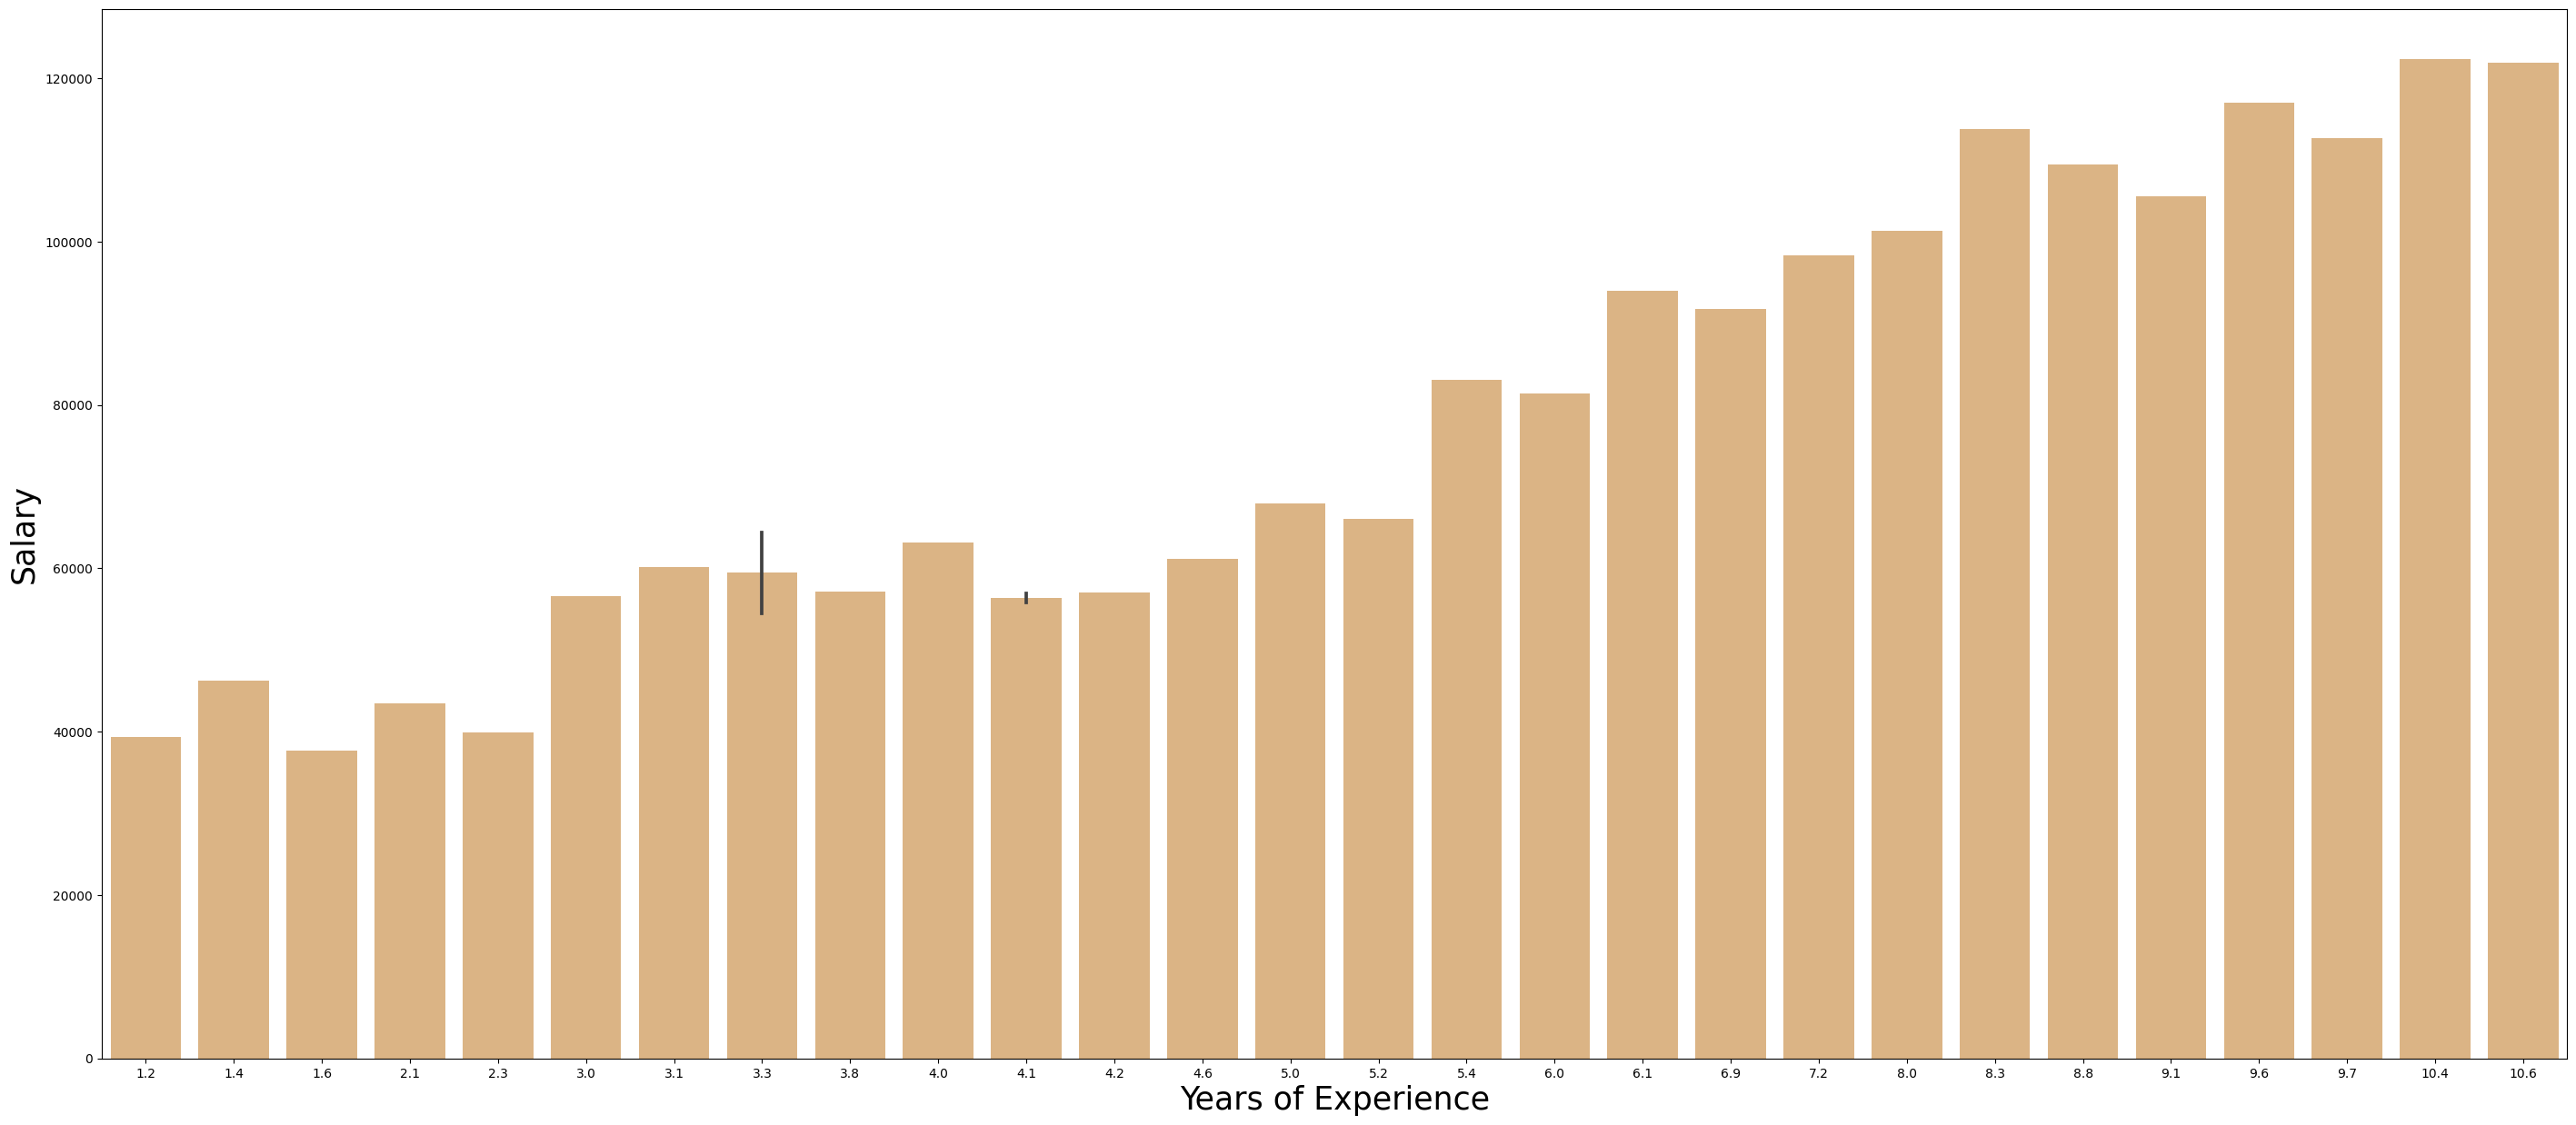

In [34]:
x=data.YearsExperience.round(5)
y=data.Salary
plt.figure(figsize=(35,15))
sns.barplot(x=x,
            y=y,
            data=data,
            estimator=np.mean,
            color='#eab676')
plt.xlabel('Years of Experience',fontsize=25)
plt.ylabel('Salary',fontsize=25)
plt.show()

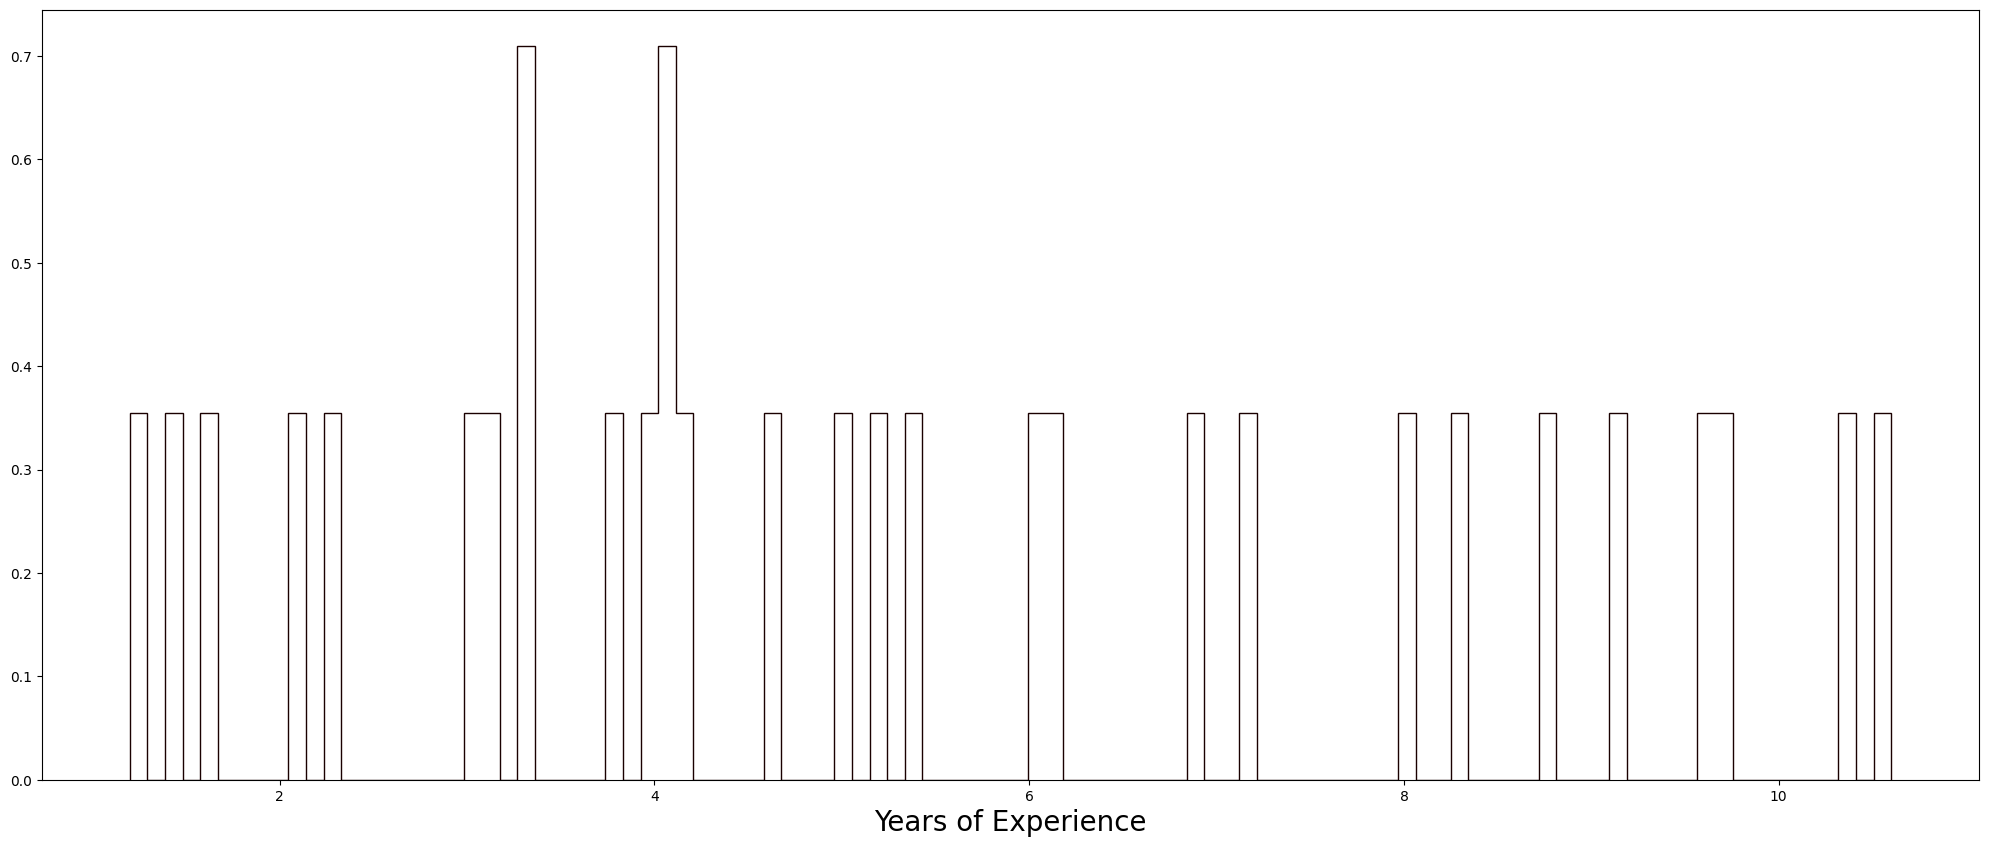

In [35]:
plt.figure(figsize=(25,10))
plt.hist(data.YearsExperience,
            histtype='step',
            bins=100, 
            density=True,
            color='#1a0000')
plt.xlabel('Years of Experience',fontsize=20)

plt.show()

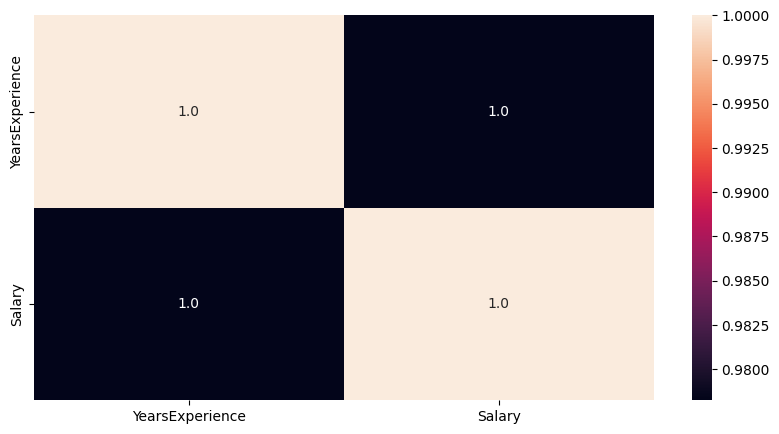

In [36]:
cr=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cr,annot=True,fmt='.1f')
plt.show()

<Figure size 2000x1000 with 0 Axes>

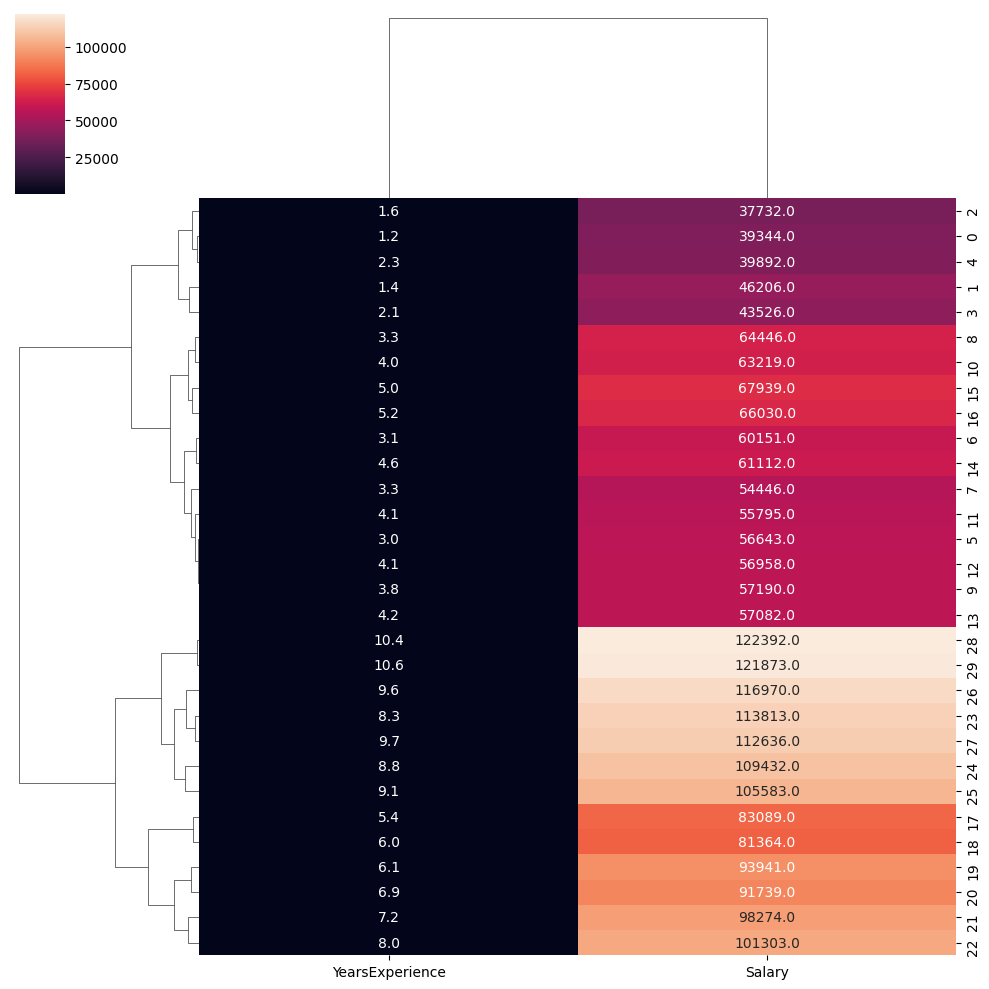

In [37]:
cr=data.corr()
plt.figure(figsize=(20,10))
sns.clustermap(data,annot=True,fmt='.1f')
plt.show()

- Model For Regression

In [41]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(X)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]


In [40]:
print(y)  # Salary

[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

- Linear Regression

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
regressor.score(X_train, y_train)

0.9411949620562127

In [49]:
regressor.score(X_test, y_test)

0.988169515729126

In [51]:
y_pred_1 = regressor.predict(X_test)
y_pred_1

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [52]:
m_1=mean_absolute_error(y_test, y_pred_1)
m_2=mean_squared_error(y_test, y_pred_1)
m_3=median_absolute_error(y_test, y_pred_1)

pd.DataFrame(data=[m_1,m_2,m_3],index=['mean_absolute_error',
                                        'mean_squared_error',
                                        'median_absolute_error'],
                                        columns=['Value'])

,Value
mean_absolute_error,2.446172e+03
mean_squared_error,1.282341e+07
median_absolute_error,1.675467e+03


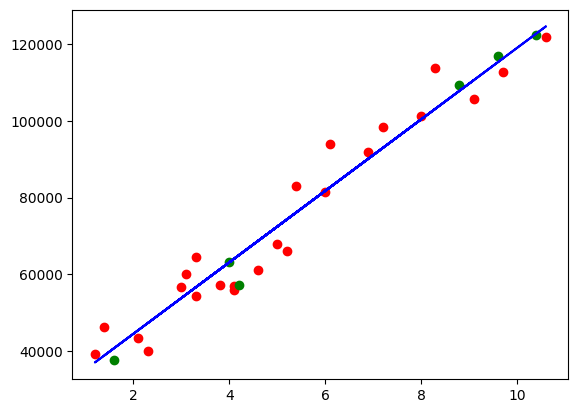

In [53]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

- Decision Tree

In [54]:
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [55]:
tree.score(X_train, y_train)

0.9965651820805788

In [56]:
tree.score(X_test, y_test)

0.9764754205531827

In [57]:
y_pred_2 = regressor.predict(X_test)
y_pred_2

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [76]:
m_4=mean_absolute_error(y_test, y_pred_2)
m_5=mean_squared_error(y_test, y_pred_2)
m_6=median_absolute_error(y_test, y_pred_2)

pd.DataFrame(data=[m_4,m_5,m_6],index=['mean_absolute_error',
                                        'mean_squared_error',
                                        'median_absolute_error'],
                                        columns=['Value'])

,Value
mean_absolute_error,2.446172e+03
mean_squared_error,1.282341e+07
median_absolute_error,1.675467e+03


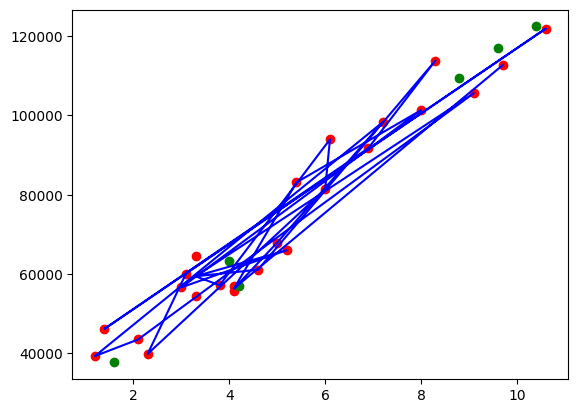

In [80]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, tree.predict(X_train), color = 'blue')
plt.show()

- Random Forest

In [60]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [61]:
regr.score(X_train, y_train)

0.9727480732235173

In [62]:
regr.score(X_test, y_test)

0.9785326693210209

In [63]:
y_pred_3 = regressor.predict(X_test)
y_pred_3

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [77]:
m_7=mean_absolute_error(y_test, y_pred_3)
m_8=mean_squared_error(y_test, y_pred_3)
m_9=median_absolute_error(y_test, y_pred_3)

pd.DataFrame(data=[m_7,m_8,m_9],index=['mean_absolute_error',
                                        'mean_squared_error',
                                        'median_absolute_error'],
                                        columns=['Value'])

,Value
mean_absolute_error,2.446172e+03
mean_squared_error,1.282341e+07
median_absolute_error,1.675467e+03


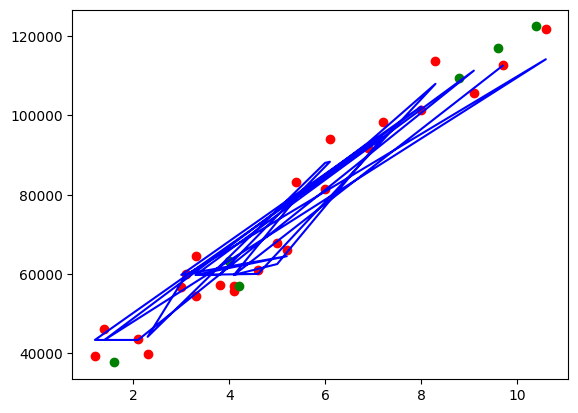

In [81]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regr.predict(X_train), color = 'blue')
plt.show()

- Logistic Regression

In [68]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

C:\Users\math\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
logistic_regressor.score(X_train, y_train)

0.2916666666666667

In [71]:
logistic_regressor.score(X_test, y_test)

0.0

- Ridge

In [72]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [73]:
ridge.score(X_train, y_train)

0.9411587052393929

In [74]:
ridge.score(X_test, y_test)

0.9875955163095869

In [75]:
y_pred_4 = ridge.predict(X_test)
y_pred_4

array([ 40955.63208201, 122397.65672228,  65018.048453  ,  63167.09334754,
       114993.83630044, 107590.0158786 ])

In [78]:
m_10=mean_absolute_error(y_test, y_pred_4)
m_11=mean_squared_error(y_test, y_pred_4)
m_12=median_absolute_error(y_test, y_pred_4)

pd.DataFrame(data=[m_10,m_11,m_12],index=['mean_absolute_error',
                                        'mean_squared_error',
                                        'median_absolute_error'],
                                        columns=['Value'])

,Value
mean_absolute_error,2.505899e+03
mean_squared_error,1.344559e+07
median_absolute_error,1.909074e+03


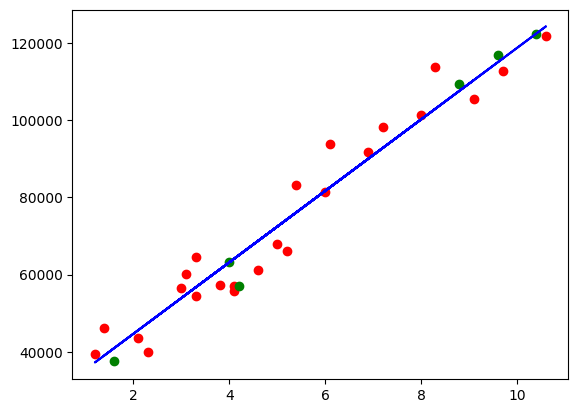

In [79]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, ridge.predict(X_train), color = 'blue')
plt.show()

- Lasso

In [82]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [83]:
lasso.score(X_train, y_train)

0.9411949618123864

In [84]:
lasso.score(X_test, y_test)

0.988168127365881

In [85]:
y_pred_5 = lasso.predict(X_test)
y_pred_5

array([ 40750.49519626, 122699.83728701,  64962.80081398,  63100.31576646,
       115249.89709694, 107799.95690687])

In [86]:
m_13=mean_absolute_error(y_test, y_pred_5)
m_14=mean_squared_error(y_test, y_pred_5)
m_15=median_absolute_error(y_test, y_pred_5)

pd.DataFrame(data=[m_13,m_14,m_15],index=['mean_absolute_error',
                                        'mean_squared_error',
                                        'median_absolute_error'],
                                        columns=['Value'])

,Value
mean_absolute_error,2.446327e+03
mean_squared_error,1.282492e+07
median_absolute_error,1.676073e+03


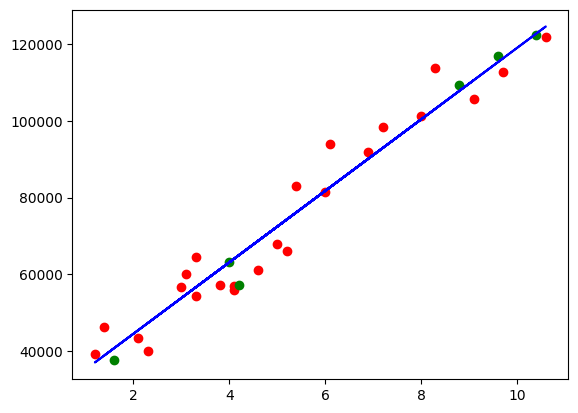

In [87]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, lasso.predict(X_train), color = 'blue')
plt.show()

- Elasticnet

In [88]:
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

ElasticNet()

In [89]:
elasticnet.score(X_train, y_train)

0.9366190139844549

In [90]:
elasticnet.score(X_test, y_test)

0.9772686017240042

In [91]:
y_pred_6 = elasticnet.predict(X_test)
y_pred_6

array([ 43060.52138548, 119297.01182326,  65584.93901483,  63852.29150488,
       112366.42178346, 105435.83174366])

In [92]:
m_16=mean_absolute_error(y_test, y_pred_6)
m_17=mean_squared_error(y_test, y_pred_6)
m_18=median_absolute_error(y_test, y_pred_6)

pd.DataFrame(data=[m_16,m_17,m_18],index=['mean_absolute_error',
                                        'mean_squared_error',
                                        'median_absolute_error'],
                                        columns=['Value'])

,Value
mean_absolute_error,4.359914e+03
mean_squared_error,2.463924e+07
median_absolute_error,4.299873e+03


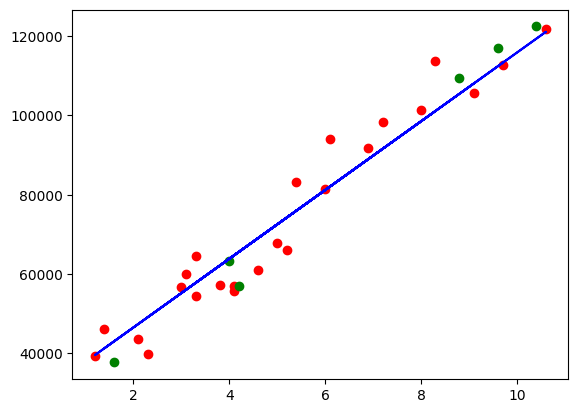

In [93]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, elasticnet.predict(X_train), color = 'blue')
plt.show()